# web2dataset


Web2dataset is a modulable library built to easily create image dataset from google image and other.
You can find the docs [here](https://samsja.github.io/web2dataset/)


* Easily create dataset from the web to train your own models for you own task
* Clean them 
* Modulable library that will allow sharing cleaners and downloaders

## Install

```shell
pip install web2dataset
```

or to get the latest update

```shell
pip install git+https://github.com/samsja/web2dataset.git@master
```

## How to use

let's perform a simple research on google image to search for 5 bike images

In [ ]:
# hide
%load_ext autoreload
%autoreload 2

Example, how to scrap google image for image of red bike in 2 lines

from command line:

```bash
web2dataset.cli 16 'a red bike' '' /tmp/my_search 1
```

or from python:


In [ ]:
# hide
import shutil

shutil.rmtree("/tmp/my_search", ignore_errors=True)

In [ ]:
from web2dataset.downloader import GoogleImageDownloader

downloader = GoogleImageDownloader("/tmp/my_search").download("a red bike", 16)

Output()

let's load the downloaded image

In [ ]:
!tree "/tmp/my_search"

/tmp/my_search
├── dataset.bin
└── images
    ├── 63812cc2-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 63836654-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 63848a0c-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 6385b486-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 6386d7ee-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 63887748-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 63898048-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 638a827c-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 638b932e-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 638cc456-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 638dd742-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 638ef730-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 63901f48-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 63913ab8-bca4-11ec-8e7c-645d865124e9.jpg
    ├── 63925e20-bca4-11ec-8e7c-645d865124e9.jpg
    └── 6393b996-bca4-11ec-8e7c-645d865124e9.jpg

1 directory, 17 files


In [ ]:
from docarray import DocumentArray

with open("/tmp/my_search/dataset.bin", "rb") as f:
    docs = DocumentArray.from_bytes(f.read())

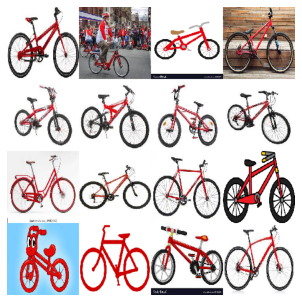

In [ ]:
def load_img(d):
    d.uri = f"/tmp/my_search/{d.uri}"
    d.load_uri_to_image_tensor()
    return d


docs = docs.apply(load_img)
docs.plot_image_sprites()

In [ ]:
# hide
shutil.rmtree("/tmp/my_search", ignore_errors=True)

And you can parelellize in one additional line

In [ ]:
from web2dataset.downloader import GoogleImageDownloader
from web2dataset.paralel import ParalelDownload

paralel_downloader = ParalelDownload(
    "/tmp/my_search", GoogleImageDownloader, num_workers=2
)
paralel_downloader.download(["a red bike","a blue bike"], 8)

Output()

or from command line:

```bash
web2dataset.cli 8 'a red bike' 'a blue bike' /tmp/my_search 2
```

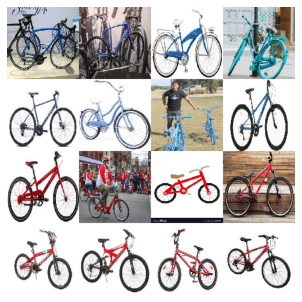

In [ ]:
from docarray import DocumentArray

with open("/tmp/my_search/dataset.bin", "rb") as f:
    docs = DocumentArray.from_bytes(f.read())

docs = docs.apply(load_img)
docs.plot_image_sprites()

In [ ]:
# hide
shutil.rmtree("/tmp/my_search", ignore_errors=True)

## How to contribute

this project is built with [nbdev](https://github.com/fastai/nbdev)

first clone the repo

```bash 
git clone https://github.com/samsja/web2dataset
```

then install poetry
```bash
pip install poetry
```

then install the dev dependencies with poetry in a virtualenv

```bash 
poetry install
```

then activate the virtual env
```bash
poetry shell
```

 first install the git hooks
 ```bash
 nbdev_install_git_hooks
 ```

then launch jupyter and code :)
```bash
jupyter lab
```


test your code with
```bash
nbdev_test_nbs
```

finaly built the py files with nbdev and the docs 
```bash
nbdev_build_lib
```

```bash
nbdev_build_docs
```

you are goot to go and submit your PR :)